<a href="https://colab.research.google.com/github/seandaza/GeoPandas/blob/main/geoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Geopandas en Pyhton

> Geopandas es una extensión de la librería pandas de Python para permitir el uso de archivos y operaciones espaciales. Depende, entre otros, de librerías como Shapely, Descartes y Fiona, sobre los que basa su funcionamiento. 


> GeoPandas brinda soporte a datos geográficos usando Pandas e implementa dos tipos de datos derivados de pandas.Series y pandas.DataFrame (**GeoSeries** y **GeoDataFrame**). Ademas, las operaciones geométricas soportadas por Geopandas son cartesianas. Antes de trabajar con estas librerías, debemos asegurarnos de que sus dependencias están instaladas.

> En este breve artículo, trataremos de producir un mapa con Python sencillo con las librerías mencionadas. Utilizaremos Jupyter Notebook, instalado en local, para mostrar el proceso y visualizar los resultados a medida que avancemos.


> Los datos tratados en este tutorial son provenientes de .... y puedes encontrarlos directamente desde aqui: ...<link>.














## Instalemos Dependencias

In [ ]:
!pip install geopandas
!pip install mapclassify
!pip install rtree
!pip install pygeos

## Importemos Librerias

In [ ]:
import ogr
import shapely
from shapely.geometry import *
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Almacenar el Dataset


> Antes que nada, verifica la ruta donde caragarás el dataset: en la carpeta local desde donde hayamos arrancado Jupyter Notebook. En este caso, para crear un mapa con Python, trabajaremos con el dataset (bogota_cadastral.json), un conjunto de datos de diferentes localidades y UPZ de la ciudad de Bogota.




## Enrutar el Dataset


>  Identifiquemos la ruta de los datos y la almacenamos en una variable representativa del dataset (bogota) y veamosla con detalle:



In [92]:
file = "/content/bogota_cadastral.json"
bogota = gpd.read_file(file)
bogota.tail()

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
1155,1151,005613,0,LA SERENA,0.025931,0.000024,1156,"LA SERENA, 005613 (1156)","MULTIPOLYGON (((-74.09329 4.71144, -74.09328 4..."
1156,1153,005610,0,LA GRANJA,0.025799,0.000031,1157,"LA GRANJA, 005610 (1157)","MULTIPOLYGON (((-74.09776 4.70056, -74.09758 4..."
1157,1154,009112,0,NIZA SUBA,0.065093,0.000080,1158,"NIZA SUBA, 009112 (1158)","MULTIPOLYGON (((-74.08359 4.71701, -74.08315 4..."
1158,1155,201503,2,SIBERIA II,0.006085,0.000002,1159,"SIBERIA II, 201503 (1159)","MULTIPOLYGON (((-74.05912 4.63150, -74.05908 4..."
1159,1156,005621,0,FLORIDA BLANCA,0.031293,0.000045,1160,"FLORIDA BLANCA, 005621 (1160)","MULTIPOLYGON (((-74.11624 4.69838, -74.11623 4..."


###Observaciones

> Notemos que existen múltiples columnas de atributos: Nombre, Area, longitud y finalmente la geometría implícita de tipo polígono.



##Identifiquemos el tipo de dato que maneja la variable 'bogota'

In [ ]:
type(bogota)

geopandas.geodataframe.GeoDataFrame

##Grafiquemos


> Grafiquemos el GeoDataFrame 'bogota' utilizando el método .plot() de matplotlib, y notemos que la grafica entrega por defecto un tamanio y un color especifico:



<Figure size 900x600 with 0 Axes>

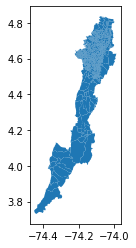

In [ ]:
bogota.plot()

##Filtramos casos:


> `GeoPandas` permite la indexación y selección de datos de la misma forma que pandas, a través de `.loc` e `.iloc`. Por ejemplo si queremos filtrar aquellas áreas mayores a 0.0006, lo podemos hacer de la siguiente manera:



In [ ]:
bogota_large = bogota.loc[bogota.shape_area > 0.0006]
bogota_large

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
2,45,102502,1,EL UVAL RURAL,0.171333,0.000708,3,"EL UVAL RURAL, 102502 (3)","MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4..."
6,120,101201,1,HOYA TEUSACA,0.276532,0.002680,7,"HOYA TEUSACA, 101201 (7)","MULTIPOLYGON (((-74.03266 4.63670, -74.03263 4..."
20,531,103108,1,LOS RIOS,0.545648,0.007196,21,"LOS RIOS, 103108 (21)","MULTIPOLYGON (((-74.11416 4.18183, -74.11413 4..."
30,735,104114,1,QUIBA ALTO,0.163960,0.000731,31,"QUIBA ALTO, 104114 (31)","MULTIPOLYGON (((-74.15816 4.52434, -74.15816 4..."
36,842,104131,1,MOCHUELO ALTO RURAL,0.247722,0.001316,37,"MOCHUELO ALTO RURAL, 104131 (37)","MULTIPOLYGON (((-74.13852 4.50786, -74.13839 4..."
39,851,102114,1,LOS ANDES,0.166946,0.000870,40,"LOS ANDES, 102114 (40)","MULTIPOLYGON (((-74.17085 4.37049, -74.17038 4..."
41,862,102707,1,OLARTE,0.208996,0.001643,42,"OLARTE, 102707 (42)","MULTIPOLYGON (((-74.14311 4.43555, -74.14306 4..."
48,924,104110,1,QUIBA BAJO,0.147216,0.000732,49,"QUIBA BAJO, 104110 (49)","MULTIPOLYGON (((-74.16025 4.54038, -74.16025 4..."
50,935,102111,1,LOS ARRAYANES,0.250372,0.001651,51,"LOS ARRAYANES, 102111 (51)","MULTIPOLYGON (((-74.13986 4.38842, -74.13973 4..."
51,939,107106,1,TUNA RURAL,0.170338,0.000808,52,"TUNA RURAL, 107106 (52)","MULTIPOLYGON (((-74.08518 4.77520, -74.09505 4..."


###Tipo de Dato


> Veamos que tipo de dato es 'bogota_large' usando la funcion type():



In [ ]:
type(bogota_large)

geopandas.geodataframe.GeoDataFrame

##Atributos de la funcion plot():


> Agregamos como atributo (edgecolor = 'black') a la funcion plot(), para incorporar los perimetros de las localidades demarcadas en el GeoDataFrame 'bogota' y veamos cómo nos cambia nuestro mapa:



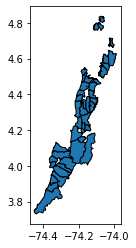

In [ ]:
bogota_large = bogota.loc[bogota.shape_area > 0.0006]
bogota_large.plot( edgecolor = 'black')

##Estadísticos


> Visuaizamos algunos estadisticos importantes del dataset:



In [ ]:
bogota.describe()

,cartodb_id,scatipo,shape_leng,shape_area
count,1160.000000,1160.000000,1160.000000,1.160000e+03
mean,580.500000,0.188793,0.036537,1.143295e-04
std,335.007463,0.489452,0.051014,5.311222e-04
min,1.000000,0.000000,0.002007,1.105100e-07
25%,290.750000,0.000000,0.018278,1.410833e-05
50%,580.500000,0.000000,0.024710,2.408121e-05
75%,870.250000,0.000000,0.033421,4.283640e-05
max,1160.000000,2.000000,0.612587,8.634275e-03


##Filtramos Casos


> Filtramos la data con un criterio en particular



In [ ]:
bogota.loc[bogota.shape_area > 0.006]

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
20,531,103108,1,LOS RIOS,0.545648,0.007196,21,"LOS RIOS, 103108 (21)","MULTIPOLYGON (((-74.11416 4.18183, -74.11413 4..."
266,575,109111,1,SAN JOSE,0.612587,0.008634,267,"SAN JOSE, 109111 (267)","MULTIPOLYGON (((-74.31811 3.87854, -74.31699 3..."
721,508,103109,1,LAS SOPAS,0.437596,0.008302,722,"LAS SOPAS, 103109 (722)","MULTIPOLYGON (((-74.20573 4.14669, -74.20569 4..."


##Grafiquemos


> Graficamos este ultimo filtrado haciendo uso del color rojo y demarcamos los perimetros de localidad a el resultado:



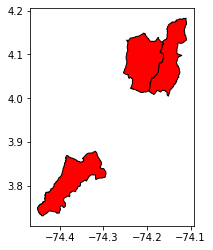

In [ ]:
bogota.loc[bogota.shape_area > 0.006].plot(color = 'red', edgecolor = 'black')

#Mapas Coropléticos


> Los mapas de coropletas o coropléticos son una forma de cartografiado cuantitativo utilizada para la representación de fenómenos discretos asociados a unidades de enumeración (provincias, países...), a las que se aplican símbolos superficiales de acuerdo con su valor. Por lo tanto, y al contrario que en los mapas de isolíneas se asume que el valor dentro de cada unidad de enumeración o corograma, se mantiene **constante**.Para ello utiliza tramas o colores diferentes aplicados a estas zonas siguiendo el criterio de '*cuanta más cantidad, más oscuro*'. Una buena ventaja de este sistema es que se comprende con facilidad por parte del usuario para muchos temas diferentes.

> Un mapa de coroplético es simplemente una representación planimétrica de un modelo de datos tridimensional, en donde se consideran superficies y no puntos.





##Nuestro Mapa Coroplético


> Construyamos un mapa coroplético en funcion a una columna específica de nuestros datos. En este caso: 'scanombre' que es una Serie que almacena las diferentes UPZ, barrios o localidades de la ciudad de Bogota. Para ello, agreguemos a la función plot() el atributo column='scanombre':



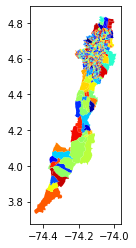

In [ ]:

bogota.plot(cmap='jet', column='scanombre')

##Ajustando Estética de Nuestro Mapa Coroplético:


> Vamos a dar formato a nuestro mapa coroplético anterior, para que sea mas agradable a la vista



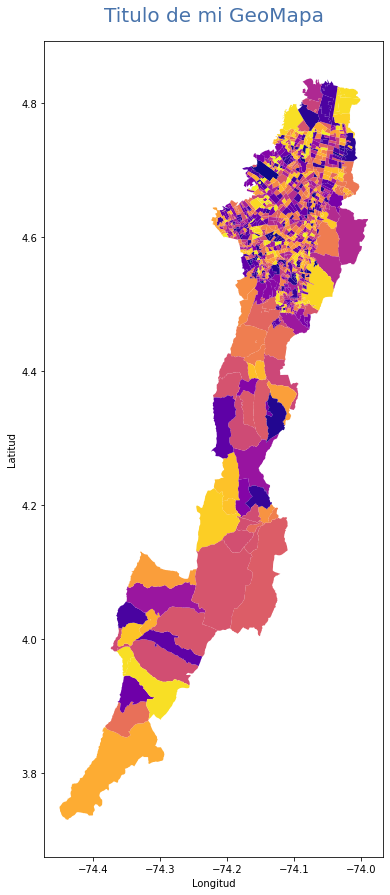

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(20, 15))
 
# Control del título y los ejes
ax.set_title('Titulo de mi GeoMapa', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
bogota.plot(column='scanombre', cmap='plasma', ax=ax, zorder=5)

#Agregación usando `dissolve`


> Es común que los datos espaciales que estemos manejando tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo podemos tener información de los estratos a nivel de manzana en una ciudad, pero estamos interesados en estudiar patrones a nivel de UPZ, barrios o localidades. En caso de trabajar con datos no espaciales, la función `groupby` se ajusta a las necesidades mencionadas. Sin embargo, `GeoPandas` provee una función que agrega características geométricas a través de la función `dissolve`.`dissolve` trabaja así: 


1. Si dos polígonos conjuntos comparten un grupo (Por ejemplo estrato), ambos son fusionados en un solo polígono o característica geométrica.
2. Los datos relacionados a cada polígono son agregados usando la función `groupby.aggregate()`.
3. Combina tanto (1) como (2).



> Veamos en nuestro caso como disolver nuestros datos en funcion a la serie 'scanombre en funcion a la serie 'cartodb' y veamoslo en un mapa coroplético:







In [ ]:
bogota[['scanombre', 'geometry', 'cartodb_id']].head()

,scanombre,geometry,cartodb_id
0,LOS LAURELES,"MULTIPOLYGON (((-74.20029 4.61725, -74.20028 4...",12
1,LA MAGDALENA,"MULTIPOLYGON (((-74.16276 4.66008, -74.16272 4...",26
2,EL UVAL RURAL,"MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4...",45
3,PALO BLANCO,"MULTIPOLYGON (((-74.09353 4.68101, -74.09481 4...",74
4,POTRERILLO,"MULTIPOLYGON (((-74.09744 4.73531, -74.09620 4...",77


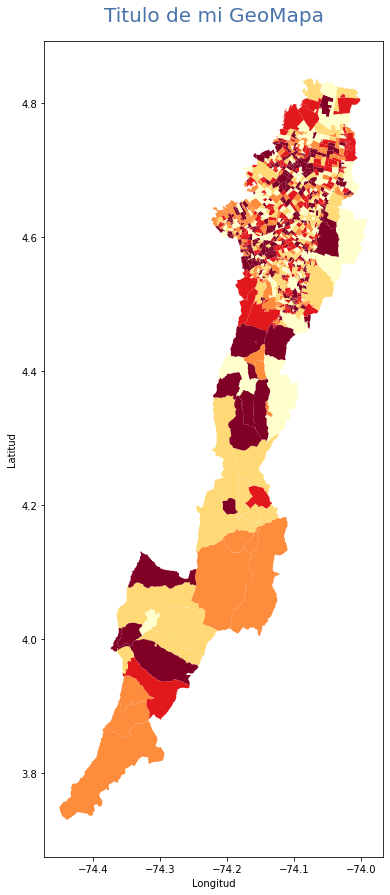

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(20, 15))
 
# Control del título y los ejes
ax.set_title('Titulo de mi GeoMapa', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

variable = bogota.dissolve(by='scanombre', aggfunc='sum')  #Escogemos la columna de agregación y la operación de agregación

variable.plot(column='cartodb_id', scheme= 'quantiles', cmap='YlOrRd' , ax=ax, zorder=5);
